https://github.com/amaiya/ktrain/blob/master/examples/text/ArabicHotelReviews-BERT.ipynb

https://www.youtube.com/watch?v=sZdIybqppqQ

In [ ]:
!pip install ktrain
  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 22.3 MB 67.6 MB/s 
     |████████████████████████████████| 981 kB 23.1 MB/s 
     |████████████████████████████████| 263 kB 53.8 MB/s 
     |████████████████████████████████| 2.8 MB 46.4 MB/s 
     |████████████████████████████████| 1.2 MB 10.0 MB/s 
     |████████████████████████████████| 468 kB 53.4 MB/s 
     |████████████████████████████████| 3.3 MB 43.4 MB/s 
     |████████████████████████████████| 101 kB 7.2 MB/s 
     |████████████████████████████████| 596 kB 58.6 MB/s 
     |████████████████████████████████| 880 kB 60.7 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.3-py3-none-any.whl size=25313110 sha256=2fc3e092b8bcfccf5a071bb376c1a3e01b8ff6aa199dbfa7f1b7d695478f2ed5
  Stored in directory: /root/.cache/pip/wheels/02/b2/23/62848f56f705788e6ad39f23f8c4b8127edbbe9daa14c9c91c
  

In [ ]:
import numpy as py
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text
import re
import string

In [ ]:
!git clone https://github.com/heguhegu/Social-Media-Tweet-Dataset-1.git

Cloning into 'Social-Media-Tweet-Dataset-1'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
dataset = pd.read_csv('/content/Social-Media-Tweet-Dataset-1/tweets.csv')

In [ ]:
dataset.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [ ]:
dataset = dataset[['text','target']]
dataset.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+')
    return url.sub(r' httpsmark ', text)


def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)


def remove_atsymbol(text):
    name = re.compile(r'@\S+')
    return name.sub(r' atsymbol ', text)


def remove_hashtag(text):
    hashtag = re.compile(r'#')
    return hashtag.sub(r' hashtag ', text)


def remove_exclamation(text):
    exclamation = re.compile(r'!')
    return exclamation.sub(r' exclamation ', text)


def remove_question(text):
    question = re.compile(r'?')
    return question.sub(r' question ', text)


def remove_punc(text):
    return text.translate(str.maketrans('','',string.punctuation))


def remove_number(text):
    number = re.compile(r'\d+')
    return number.sub(r' number ', text)


def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "..."
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' emoji ', string)

In [ ]:
dataset['text'] = dataset['text'].str.lower()
dataset['text'] = dataset['text'].apply(lambda text: remove_URL(text))
dataset['text'] = dataset['text'].apply(lambda text: remove_html(text))
dataset['text'] = dataset['text'].apply(lambda text: remove_atsymbol(text))
dataset['text'] = dataset['text'].apply(lambda text: remove_hashtag(text))
dataset['text'] = dataset['text'].apply(lambda text: remove_exclamation(text))
dataset['text'] = dataset['text'].apply(lambda text: remove_punc(text))
dataset['text'] = dataset['text'].apply(lambda text: remove_number(text))
dataset['text'] = dataset['text'].apply(lambda text: remove_emoji(text))

In [ ]:
dataset

,text,target
0,communal violence in bhainsa telangana stones ...,1
1,telangana section number has been imposed in...,1
2,arsonist sets cars ablaze at dealership https...,1
3,arsonist sets cars ablaze at dealership https...,1
4,lord jesus your love brings freedom and pardon...,0
...,...,...
11365,media should have warned us well in advance th...,0
11366,i feel directly attacked emoji i consider mo...,0
11367,i feel directly attacked emoji i consider mo...,0
11368,ok who remember outcast nd the dora au those a...,0


In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(dataset, 
                                                                   'text', # name of column containing review text
                                                                   label_columns='target',
                                                                   maxlen=200, 
                                                                   #max_features=100000,
                                                                   preprocess_mode='bert',
                                                                   val_pct=0.2) #automatically sample 20% of the data for validation

['not_target', 'target']
       not_target  target
3253          1.0     0.0
3027          1.0     0.0
10491         1.0     0.0
5760          0.0     1.0
1388          1.0     0.0
['not_target', 'target']
      not_target  target
6280         0.0     1.0
3769         0.0     1.0
6778         0.0     1.0
2316         1.0     0.0
4064         1.0     0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
x_train[0].shape

(9096, 200)

In [ ]:
model = text.text_classifier('bert', 
                             train_data = (x_train, y_train) , 
                             preproc=preproc)
learner = ktrain.get_learner(model=model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=6)

Is Multi-Label? False
maxlen is 200
done.


Instantiate a Learner object and call the lr_find and lr_plot methods to help identify a good learning rate.

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1516/1516 [==============================] - 436s 276ms/step - loss: 2.2930 - accuracy: 0.7957


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


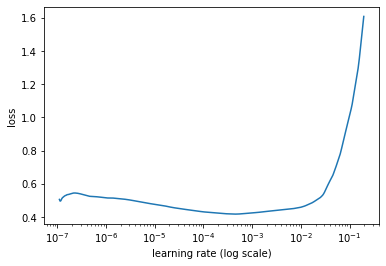

In [ ]:
learner.lr_plot()

In [ ]:
#learner.fit_onecycle(lr = 2e-5, epochs = 5)
learner.fit_onecycle(lr = 0.001, epochs = 5)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/5
1516/1516 [==============================] - 492s 315ms/step - loss: 0.4930 - accuracy: 0.8141 - val_loss: 0.4891 - val_accuracy: 0.8083
Epoch 2/5
1516/1516 [==============================] - 480s 317ms/step - loss: 0.5194 - accuracy: 0.8069 - val_loss: 0.4920 - val_accuracy: 0.8083
Epoch 3/5
1516/1516 [==============================] - 481s 317ms/step - loss: 0.5328 - accuracy: 0.8054 - val_loss: 0.5219 - val_accuracy: 0.8083
Epoch 4/5
1516/1516 [==============================] - 474s 312ms/step - loss: 0.5037 - accuracy: 0.8133 - val_loss: 0.4922 - val_accuracy: 0.8083
Epoch 5/5
1516/1516 [==============================] - 473s 312ms/step - loss: 0.4886 - accuracy: 0.8155 - val_loss: 0.4888 - val_accuracy: 0.8083


In [ ]:
learner.fit_onecycle(lr = 0.0001, epochs = 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
1516/1516 [==============================] - 481s 317ms/step - loss: 0.4794 - accuracy: 0.8155 - val_loss: 0.4888 - val_accuracy: 0.8083
Epoch 2/5
1516/1516 [==============================] - 474s 313ms/step - loss: 0.4809 - accuracy: 0.8155 - val_loss: 0.4966 - val_accuracy: 0.8083
Epoch 3/5
1516/1516 [==============================] - 474s 313ms/step - loss: 0.4838 - accuracy: 0.8155 - val_loss: 0.4917 - val_accuracy: 0.8083
Epoch 4/5
1516/1516 [==============================] - 474s 313ms/step - loss: 0.4815 - accuracy: 0.8155 - val_loss: 0.4887 - val_accuracy: 0.8083
Epoch 5/5
1516/1516 [==============================] - 482s 318ms/step - loss: 0.4794 - accuracy: 0.8155 - val_loss: 0.4889 - val_accuracy: 0.8083
